In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("Data.csv");

In [4]:
data.columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'moonphase', 'year', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'Partly cloudy',
       'Rainy', 'Overcast', 'Clear', 'Snow'],
      dtype='object')

## We will analyse the data and observe When it will result in particular condition

In [5]:
NewData=data[["temp","snow","windspeed","windgust","solarenergy","humidity","dew","precip","precipprob",
             "Partly cloudy","Rainy","Overcast","Clear","Snow"]]

In [6]:
NewData.corr()

,temp,snow,windspeed,windgust,solarenergy,humidity,dew,precip,precipprob,Partly cloudy,Rainy,Overcast,Clear,Snow
temp,1.000000,-0.157125,-0.138596,-0.089459,0.356022,0.202029,0.939180,0.045364,0.096454,0.199460,0.098455,-0.156606,-0.108854,-0.254857
snow,-0.157125,1.000000,0.018539,0.012132,-0.105908,0.071083,-0.114938,0.048358,0.076339,-0.084984,0.076445,0.092249,0.006787,0.475657
windspeed,-0.138596,0.018539,1.000000,0.694563,0.001830,-0.230826,-0.202829,0.162960,0.171132,0.055238,0.171345,-0.033522,-0.051052,0.113624
windgust,-0.089459,0.012132,0.694563,1.000000,-0.040449,-0.114145,-0.118767,0.223164,0.253621,0.037512,0.254755,0.009384,-0.086502,0.086887
solarenergy,0.356022,-0.105908,0.001830,-0.040449,1.000000,-0.430756,0.156604,-0.269606,-0.321000,0.296075,-0.320940,-0.420732,0.134033,-0.145716
humidity,0.202029,0.071083,-0.230826,-0.114145,-0.430756,1.000000,0.522612,0.412340,0.530981,-0.301289,0.532435,0.455886,-0.179140,0.057856
dew,0.939180,-0.114938,-0.202829,-0.118767,0.156604,0.522612,1.000000,0.175123,0.263566,0.077680,0.265733,0.012682,-0.157950,-0.204174
precip,0.045364,0.048358,0.162960,0.223164,-0.269606,0.412340,0.175123,1.000000,0.455693,-0.256411,0.456163,0.343794,-0.084064,0.075107
precipprob,0.096454,0.076339,0.171132,0.253621,-0.321000,0.530981,0.263566,0.455693,1.000000,-0.206559,0.998938,0.348499,-0.184475,0.181044
Partly cloudy,0.199460,-0.084984,0.055238,0.037512,0.296075,-0.301289,0.077680,-0.256411,-0.206559,1.000000,-0.207097,-0.831760,-0.475807,-0.075392


### For rainy conditions , We use windspeed,windgust,solarenergy,dew,precip,precipprob,humidity

### For Partly Cloudy conditions , We use solarenergy,precip,precipprob,humidity

### For Overcast conditions , We use solarenergy,precip,precipprob,humidity
### For Clear conditions , We use solarenergy,precip,precipprob,humidity
### For Snow conditions , We use temp,snow

In [7]:
import random
def plotDays(condition):
    months=[x for x in data.columns if "month" in x]
    noOfdays=[]
    colors=["red","green","yellow","pink","violet"]
    for i in range(len(months)):
        noOfdays.append(data[data[months[i]]==1][condition].sum())
    plt.bar(months,noOfdays,color=random.choice(colors))
    plt.xticks(rotation=90)
    plt.xlabel("Month")
    plt.ylabel("No of "+condition+" Days")
    plt.title("No of "+condition+" Days in a Month")

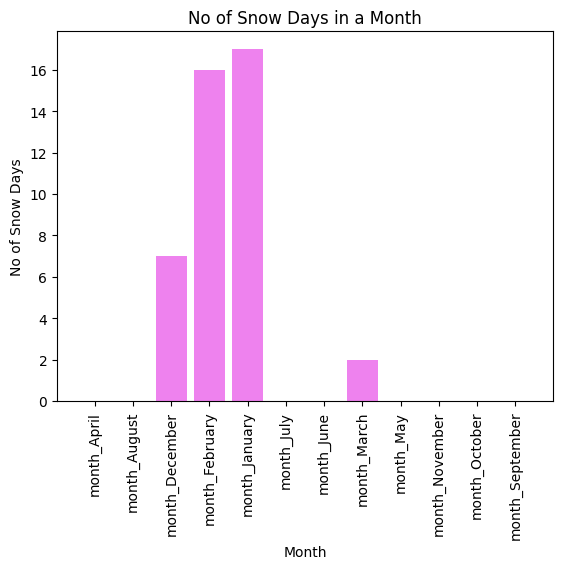

In [8]:
plotDays("Snow")

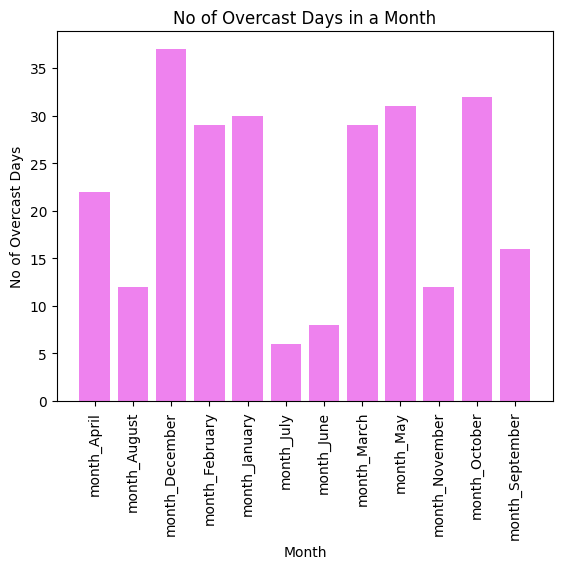

In [9]:
plotDays("Overcast")

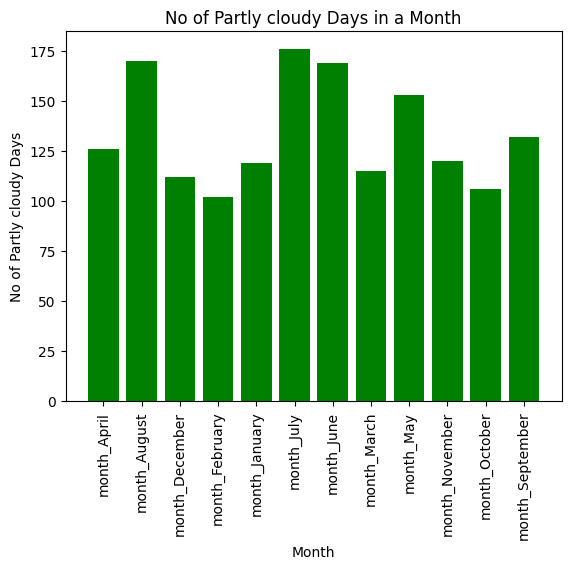

In [10]:
plotDays("Partly cloudy")

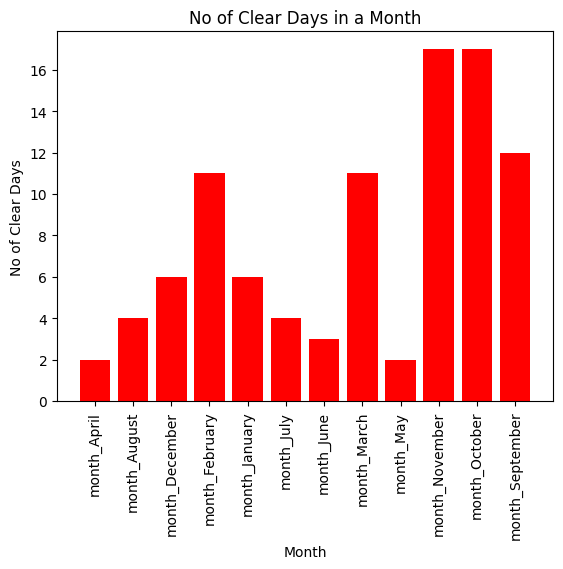

In [11]:
plotDays("Clear")

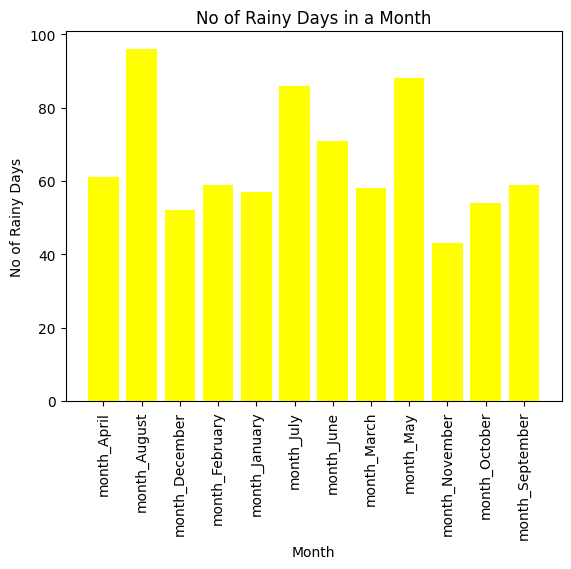

In [12]:
plotDays("Rainy")

In [13]:
x=data[["temp","snow","windspeed","windgust","solarenergy","humidity","dew","precip","precipprob"]].values
y=data[["Partly cloudy","Rainy","Overcast","Clear","Snow"]].values

In [14]:
x.shape

(1960, 9)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
joblib.dump(scaler,"scalernew.pkl")

['scalernew.pkl']

In [17]:
# model = Sequential()
# model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(y_train.shape[1], activation='sigmoid'))

In [18]:
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

In [20]:
# y_pred=model.predict(x_test)

In [21]:
# predictions = np.where(y_pred > 0.25, 1, 0)

In [22]:
# def accuracy(i):
#     num = 0
#     for j in range(len(y_test)):
#         if y_test[j][i]==predictions[j][i]:
#             num=num+1
#     return (num/len(y_test))

In [23]:
# print("Partly cloudy accuracy: ",accuracy(0))
# print("Rain accuracy: ",accuracy(1))
# print("Overcast accuracy: ",accuracy(2))
# print("Clear accuracy: ",accuracy(3))
# print("Snow accuracy: ",accuracy(4))

# we have good accuracy on most of the predictions on conditions 

In [24]:
# model.save("model_03.keras")

In [25]:
# import joblib
# joblib.dump(scaler, 'scaler_03.pkl')

In [26]:
CO2 = pd.read_csv("Co2Data.csv")

In [27]:
CO2

,year,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,1800,3.712646e+12,0.000,0.000,0.253,22.779541,4.874775,3206.898104,25.422233,1.241087,...,56.674227,25.280529,0.017285,0.085767,0.10639,0.003337,5526.534,5933.42,-63.5410,-1.2278
1,1801,3.712646e+12,0.000,0.000,0.267,0.015000,5.797000,3206.898104,25.422233,1.241087,...,56.674227,25.280529,0.017285,0.085767,0.10639,0.003337,5526.534,5933.42,-63.5410,-1.2278
2,1802,3.712646e+12,0.000,0.000,0.289,0.022000,8.219000,3206.898104,25.422233,1.241087,...,56.674227,25.280529,0.017285,0.085767,0.10639,0.003337,5526.534,5933.42,-63.5410,-1.2278
3,1803,3.712646e+12,0.000,0.000,0.297,0.007000,2.532000,3206.898104,25.422233,1.241087,...,56.674227,25.280529,0.017285,0.085767,0.10639,0.003337,5526.534,5933.42,-63.5410,-1.2278
4,1804,3.712646e+12,0.000,0.000,0.333,0.037000,12.346000,3206.898104,25.422233,1.241087,...,56.674227,25.280529,0.017285,0.085767,0.10639,0.003337,5526.534,5933.42,-63.5410,-1.2278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2018,1.812469e+13,38.971,0.117,5377.797,165.635000,3.178000,5486.095000,128.815000,2.404000,...,8.143000,17.764000,0.035000,0.228000,0.27300,0.010000,5935.520,6154.65,420.3550,7.8160
219,2019,1.854055e+13,40.896,0.122,5262.145,-115.652000,-2.151000,5374.306000,-111.789000,-2.038000,...,8.085000,17.639000,0.035000,0.230000,0.27600,0.010000,5819.480,6039.74,423.5390,8.0490
220,2020,1.802736e+13,40.688,0.121,4714.628,-547.517000,-10.405000,4829.357000,-544.948000,-10.140000,...,8.294000,17.514000,0.035000,0.232000,0.27800,0.010000,5289.130,5505.18,471.9290,10.0100
221,2021,1.909938e+13,41.312,0.123,5032.213,317.585000,6.736000,5159.809000,330.451000,6.843000,...,8.242000,17.392000,0.035000,0.234000,0.28000,0.010000,5711.184,5930.13,539.9600,10.7300


In [28]:
CO2.columns

Index(['year', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2',
       'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc',
       'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
       'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
       'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       

In [29]:
features=["gdp","co2","nitrous_oxide","year","temperature_change_from_ch4","temperature_change_from_co2"
         ,"temperature_change_from_ghg","temperature_change_from_n2o","total_ghg","oil_co2"]

In [30]:
data=CO2[features]

In [31]:
data.corr()

,gdp,co2,nitrous_oxide,year,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,oil_co2
gdp,1.000000,0.858584,0.814958,0.722777,0.834680,0.912294,0.905454,0.929852,0.666703,0.864284
co2,0.858584,1.000000,0.580020,0.930823,0.859276,0.839153,0.846473,0.829307,0.587489,0.983254
nitrous_oxide,0.814958,0.580020,1.000000,0.519346,0.529267,0.690398,0.668914,0.717530,0.638887,0.570523
year,0.722777,0.930823,0.519346,1.000000,0.656293,0.660096,0.662192,0.638800,0.459108,0.879834
temperature_change_from_ch4,0.834680,0.859276,0.529267,0.656293,1.000000,0.963213,0.973764,0.950755,0.512874,0.891660
temperature_change_from_co2,0.912294,0.839153,0.690398,0.660096,0.963213,1.000000,0.999062,0.989295,0.574251,0.858549
temperature_change_from_ghg,0.905454,0.846473,0.668914,0.662192,0.973764,0.999062,1.000000,0.988547,0.567907,0.868402
temperature_change_from_n2o,0.929852,0.829307,0.717530,0.638800,0.950755,0.989295,0.988547,1.000000,0.604091,0.856319
total_ghg,0.666703,0.587489,0.638887,0.459108,0.512874,0.574251,0.567907,0.604091,1.000000,0.567843
oil_co2,0.864284,0.983254,0.570523,0.879834,0.891660,0.858549,0.868402,0.856319,0.567843,1.000000


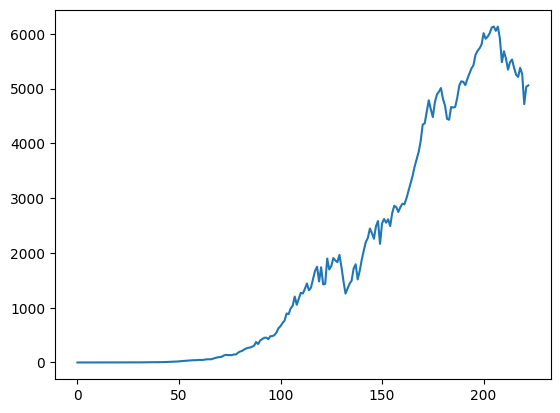

In [32]:
plt.plot(data["co2"])

## from the above plot, we can see that co2 is drastically increasing , which may result in global warming

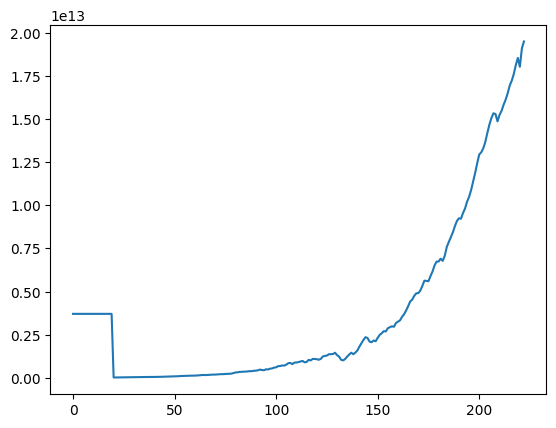

In [33]:
plt.plot(data["gdp"])

### We can see that there is increase in gdp

In [34]:
def getDatawithDate(name,days):
    features=[]
    targets=[]
    datas=list(data[name].values)
    yrs=list(data["year"].values)
    for i in range(len(datas)-days-1):
        sub=datas[i:i+days]
        targets.append(datas[i+days])
        sub.append(yrs[i+days])
        features.append(sub)
    features=np.array(features)
    targets=np.array(targets)
    targets=targets.reshape(-1,1)
    return features,targets
def getData(name,days):
    features=[]
    targets=[]
    datas=list(data[name].values)
    for i in range(len(datas)-days-1):
        sub=datas[i:i+days]
        targets.append(datas[i+days])
        features.append(sub)
    features=np.array(features)
    targets=np.array(targets)
    targets=targets.reshape(-1,1)
    return features,targets

In [35]:
f,t=getData("co2",15)

In [36]:
f.shape

(207, 15)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(f,t,test_size=0.2)

In [38]:
y_train[0]

array([0.601])

In [39]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9963793284994691

## Now we have predicted co2, based on that we will predict gdp

In [42]:
gdp_f,gdp_t = getDatawithDate("gdp",15)

In [43]:
y_pred_co2=model.predict(f)

In [44]:
gdp_f.shape

(207, 16)

In [45]:
## we will combine co2 predicted value with previous 15days gdp
y_pred_co2_reshaped = y_pred_co2.reshape(-1, 1)
gdp_f= np.concatenate((gdp_f, y_pred_co2_reshaped), axis=1)

In [46]:
gdp_x_train,gdp_x_test,gdp_y_train,gdp_y_test=train_test_split(gdp_f,gdp_t,test_size=0.2)

In [47]:
gdp_x_train[0]

array([8.43256693e+12, 8.78720267e+12, 9.09129128e+12, 9.25037704e+12,
       9.22468798e+12, 9.55265843e+12, 9.81494084e+12, 1.02112051e+13,
       1.04888564e+13, 1.08869515e+13, 1.13755617e+13, 1.18817932e+13,
       1.24384444e+13, 1.29474169e+13, 1.30738091e+13, 2.00200000e+03,
       5.89736604e+03])

In [48]:
model_gdp = LinearRegression()
model_gdp.fit(gdp_x_train,gdp_y_train)

LinearRegression()

In [49]:
gdp_y_pred=model_gdp.predict(gdp_x_test)
r2_score(gdp_y_test,gdp_y_pred)

0.9931634745545077

### Now lets predict nitrous oxide,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,oil_co2

In [50]:
y_pred_gdp=model_gdp.predict(gdp_f)

In [51]:
X = np.concatenate((y_pred_gdp, y_pred_co2_reshaped), axis=1)

In [52]:
Y = np.concatenate((
    np.array(data["nitrous_oxide"]).reshape(-1, 1),
    np.array(data["temperature_change_from_ch4"]).reshape(-1, 1),
    np.array(data["temperature_change_from_co2"]).reshape(-1, 1),
    np.array(data["temperature_change_from_ghg"]).reshape(-1, 1),
    np.array(data["temperature_change_from_n2o"]).reshape(-1, 1),
    np.array(data["total_ghg"]).reshape(-1, 1),
    np.array(data["oil_co2"]).reshape(-1, 1)
), axis=1)

In [53]:
Y=Y[16:]

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [55]:
X_train.shape

(165, 2)

In [56]:
model_all = LinearRegression()
model_all.fit(X_train,Y_train)

LinearRegression()

In [57]:
Y_pred=model_all.predict(X_test)
r2_score(Y_test,Y_pred)

0.7841306311784969

In [58]:
Y_pred[0]

array([2.45422803e+02, 2.89335818e-02, 1.26189096e-01, 1.59990175e-01,
       4.92531182e-03, 5.65779634e+03, 1.91182140e+03])

In [59]:
## lets analyse our predicted values
def plotwithpred(a,b,name):
    plt.title("Actual "+name+" vs predicted "+name)
    plt.plot(a)
    plt.plot(b)

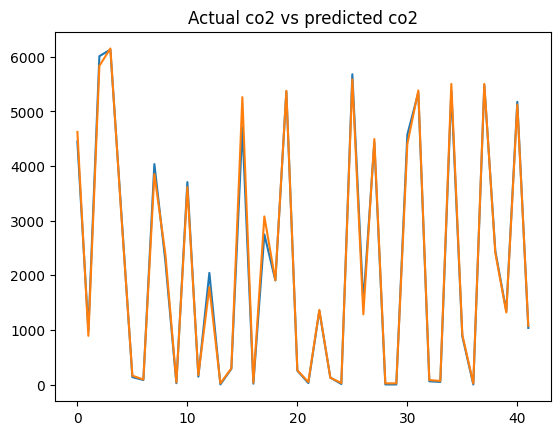

In [60]:
plotwithpred(y_test,y_pred,"co2")

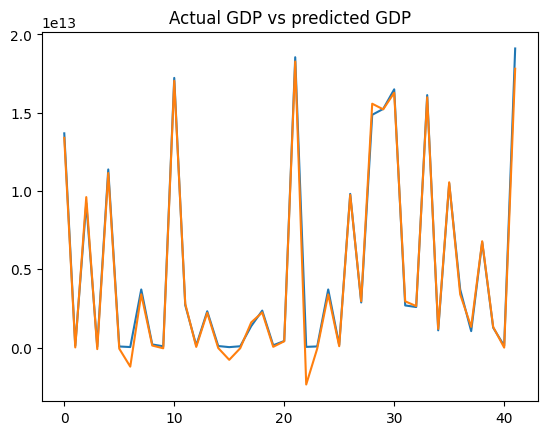

In [61]:
plotwithpred(gdp_y_test,gdp_y_pred,"GDP")

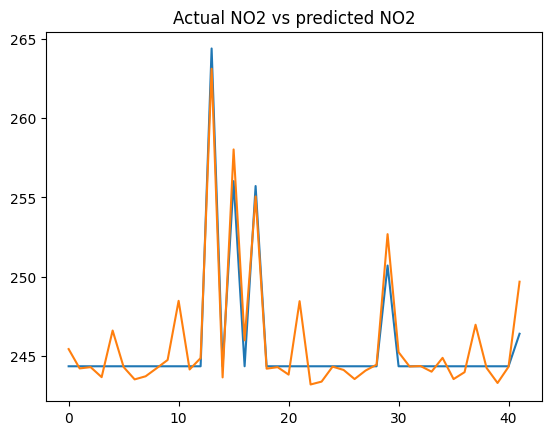

In [62]:
plotwithpred(Y_test[:,0],Y_pred[:,0],"NO2")

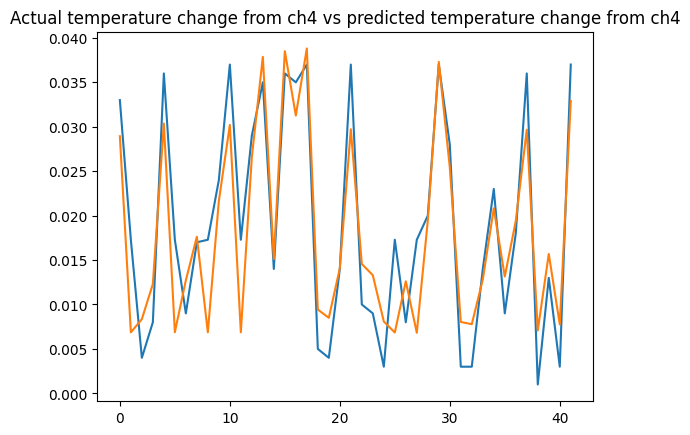

In [63]:
plotwithpred(Y_test[:,1],Y_pred[:,1],"temperature change from ch4")

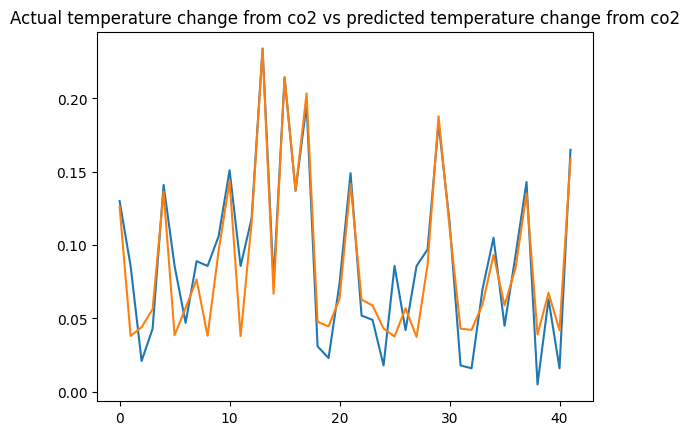

In [64]:
plotwithpred(Y_test[:,2],Y_pred[:,2],"temperature change from co2")

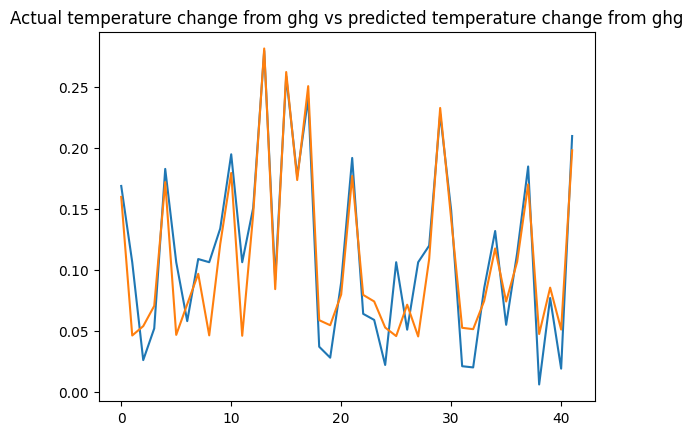

In [65]:
plotwithpred(Y_test[:,3],Y_pred[:,3],"temperature change from ghg")

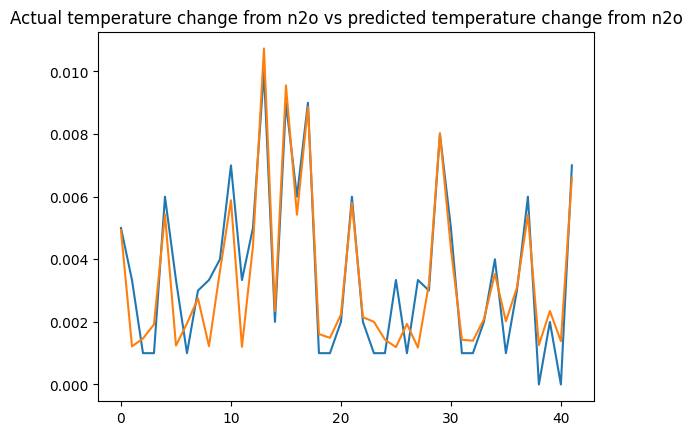

In [66]:
plotwithpred(Y_test[:,4],Y_pred[:,4],"temperature change from n2o")

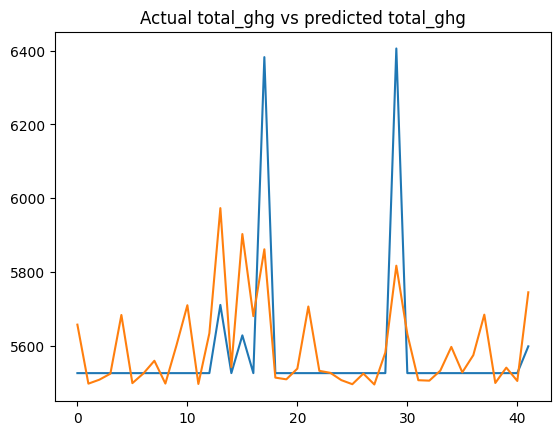

In [67]:
plotwithpred(Y_test[:,5],Y_pred[:,5],"total_ghg")

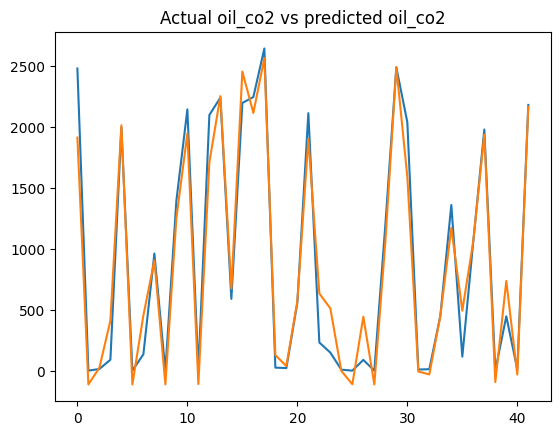

In [68]:
plotwithpred(Y_test[:,6],Y_pred[:,6],"oil_co2")

In [69]:
# joblib.dump(model,"co2model.pkl")
# joblib.dump(model_gdp,"gdpmodel.pkl")
# joblib.dump(model_all,"allmodel.pkl")

In [70]:
sea = pd.read_csv("sea_level_NASA.csv")

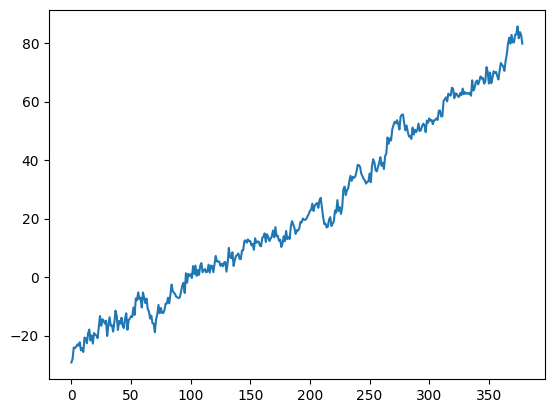

In [71]:
plt.plot(sea["NASA (mm)"])

In [72]:
def getDatawithDate2(name,days,data):
    features=[]
    targets=[]
    datas=list(data[name].values)
    yrs=list(data["Year"].values)
    mnths=list(data["Month"].values)
    for i in range(len(datas)-days-1):
        sub=datas[i:i+days]
        targets.append(datas[i+days])
        sub.append(yrs[i+days])
        sub.append(mnths[i+days])
        features.append(sub)
    features=np.array(features)
    targets=np.array(targets)
    targets=targets.reshape(-1,1)
    return features,targets

In [73]:
sea_x,sea_y=getDatawithDate2("NASA (mm)",5,sea)

In [74]:
sea_x

array([[ -29.17,  -27.86,  -24.05, ...,  -23.76, 1993.  ,    6.  ],
       [ -27.86,  -24.05,  -24.26, ...,  -23.01, 1993.  ,    7.  ],
       [ -24.05,  -24.26,  -23.76, ...,  -23.42, 1993.  ,    8.  ],
       ...,
       [  80.26,   80.24,   82.86, ...,   85.7 , 2024.  ,    4.  ],
       [  80.24,   82.86,   83.06, ...,   81.67, 2024.  ,    5.  ],
       [  82.86,   83.06,   85.7 , ...,   83.79, 2024.  ,    6.  ]])

In [75]:
sea_x_train,sea_x_test,sea_y_train,sea_y_test=train_test_split(sea_x,sea_y,test_size=0.2,random_state=20)

In [76]:
model_sea=LinearRegression()
model_sea.fit(sea_x_train,sea_y_train)

LinearRegression()

In [77]:
sea_y_pred=model_sea.predict(sea_x_test)
r2_score(sea_y_test,sea_y_pred)

0.9952441300708161

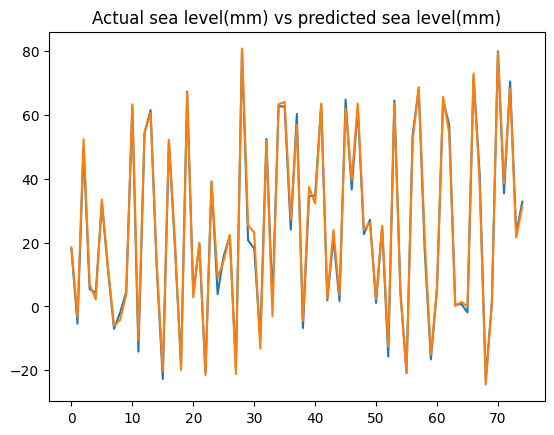

In [78]:
plotwithpred(sea_y_test,sea_y_pred,"sea level(mm)")

In [79]:
joblib.dump(model_sea,"seamodel.pkl")

['seamodel.pkl']